In [47]:
d <- read.csv("Comparative Politics.csv")
d = d[,-1]
d$country = as.character(d$country)
d$year = as.numeric(d$year)


index,country,year,gdp,infrate,trade,schooling,invest60,invest70,invest80,industry
1,USA,1960,2879,NA,9.693181,43.8,NA,NA,NA,NA
1,USA,1961,2929,1.075182,9.444654,NA,NA,NA,NA,NA
1,USA,1962,3103,1.116071,9.429324,NA,NA,NA,NA,NA
1,USA,1963,3227,1.214128,9.470706,NA,NA,NA,NA,NA
1,USA,1964,3420,1.308615,9.725879,NA,NA,NA,NA,NA
1,USA,1965,3667,1.668461,9.730347,43.8,NA,NA,NA,NA
1,USA,1966,3974,2.991000,10.097592,NA,NA,NA,NA,NA
1,USA,1967,4154,2.775636,10.208102,NA,NA,NA,NA,NA
1,USA,1968,4494,4.217721,10.593937,NA,NA,NA,NA,NA
1,USA,1969,4805,5.414701,10.635633,NA,NA,NA,NA,NA


In [34]:
require("Synth")

## Replication Code for
# A. Abadie, A. Diamond, and J. Hainmueller. 2014.
# Comparative Politics and the Synthetic Control Method
# American Journal of Political Science.

rm(list=ls())
library(foreign)
library(Synth)
library(xtable)

# Load Data 
d <- read.csv("Comparative Politics.csv")
d = d[,-1]
d$country = as.character(d$country)
d$year = as.numeric(d$year)

## Table 1 & 2, Figure 1, 2, & 3

## pick v by cross-validation
# data setup for training model
dataprep.out <-
  dataprep(
           foo = d,
           predictors    = c("gdp","trade","infrate"),
           dependent     = "gdp",
           unit.variable = 1,
           time.variable = 3,
           special.predictors = list(
            list("industry", 1971:1980, c("mean")),
            list("schooling",c(1970,1975), c("mean")),
            list("invest70" ,1980, c("mean"))
           ),
           treatment.identifier = 7,
           controls.identifier = unique(d$index)[-7],
           time.predictors.prior = 1971:1980,
           time.optimize.ssr = 1981:1990,
           unit.names.variable = 2,
           time.plot = 1960:2003
         )

# fit training model
synth.out <- 
  synth(
        data.prep.obj=dataprep.out,
        Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
        )



X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 4580.216 

solution.v:
 0.6018912 0.1014169 0.04540535 0.00570698 0.08136608 0.1642135 

solution.w:
 0.135177 2.668e-07 0.5076092 2.341e-07 1.0741e-06 2.839e-07 2.238e-07 8.668e-07 2.537e-07 0.1657566 0.1463509 1.512e-07 1.207e-07 1.437e-07 0.04509834 4.3205e-06 



In [35]:

# data prep for main model
dataprep.out <-
 dataprep(
  foo = d,
  predictors    = c("gdp","trade","infrate"),
  dependent     = "gdp",
  unit.variable = 1,
  time.variable = 3,
  special.predictors = list(
    list("industry" ,1981:1990, c("mean")),
    list("schooling",c(1980,1985), c("mean")),
    list("invest80" ,1980, c("mean"))
  ),
  treatment.identifier = 7,
  controls.identifier = unique(d$index)[-7],
  time.predictors.prior = 1981:1990,
  time.optimize.ssr = 1960:1989,
  unit.names.variable = 2,
  time.plot = 1960:2003
)

# fit main model with v from training model
synth.out <- synth(
  data.prep.obj=dataprep.out,
  custom.v=as.numeric(synth.out$solution.v)
  )

#### Table 2
synth.tables <- synth.tab(
                          dataprep.res = dataprep.out,
                          synth.res = synth.out
                          ); synth.tables
                      
# Replace means for OECD sample (computed externally using proper pop weighting)
synth.tables$tab.pred[,3]          <- c(8021.1,31.9,7.4,34.2,44.1,25.9)
colnames(synth.tables$tab.pred)[3] <- "Rest of OECD Sample"
rownames(synth.tables$tab.pred) <- c("GDP per-capita","Trade openness",
                                     "Inflation rate","Industry share",
                                     "Schooling","Investment rate")

xtable(round(synth.tables$tab.pred,1),digits=1)



 Missing data: treated unit; special predictor: special.industry.1981.1990 ; for period: 1990 
 We ignore (na.rm = TRUE) all missing values for predictors.op.

X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 optimization over w weights: computing synthtic control unit 
 


**************** 
 v weights supplied manually: computing synthtic control unit 
 


**************** 
**************** 
**************** 

MSPE (LOSS V): 14178.12 

solution.v:
 0.6018912 0.1014169 0.04540535 0.00570698 0.08136608 0.1642135 

solution.w:
 0.2186379 0.0009999536 0.4210465 0.001178154 0.001142792 0.0009931544 0.0006421713 0.08707375 0.0007103163 0.1117577 0.1532222 0.0003773829 0.0004049095 0.0007165522 0.0005569706 0.0005395781 



$tab.pred
                              Treated Synthetic Sample Mean
gdp                         15808.900 15804.780   13669.381
trade                          56.778    56.912      59.831
infrate                         2.595     3.508       7.617
special.industry.1981.1990     34.538    34.385      33.794
special.schooling.1980.1985    55.500    55.235      38.659
special.invest80.1980          27.018    27.036      25.895

$tab.v
                            v.weights
gdp                             0.602
trade                           0.101
infrate                         0.045
special.industry.1981.1990      0.006
special.schooling.1980.1985     0.081
special.invest80.1980           0.164

$tab.w
   w.weights  unit.names unit.numbers
1      0.219         USA            1
2      0.001          UK            2
3      0.421     Austria            3
4      0.001     Belgium            4
5      0.001     Denmark            5
6      0.001      France            6
8      0.001       Italy            8
9      0.087 Netherlands            9
10     0.001      Norway           10
12     0.112 Switzerland           12
14     0.153       Japan           14
16     0.000      Greece           16
18     0.000    Portugal           18
19     0.001       Spain           19
20     0.001   Australia           20
21     0.001 New Zealand           21

$tab.loss
          Loss W   Loss V
[1,] 0.001638086 14178.12

,Treated,Synthetic,Rest of OECD Sample
GDP per-capita,15808.9,15804.8,8021.1
Trade openness,56.8,56.9,31.9
Inflation rate,2.6,3.5,7.4
Industry share,34.5,34.4,34.2
Schooling,55.5,55.2,44.1
Investment rate,27.0,27.0,25.9


In [36]:
#### Table 1
# synth weights
tab1 <- data.frame(synth.tables$tab.w)
tab1[,1] <- round(tab1[,1],2) 
# regression weights
X0 <- cbind(1,t(dataprep.out$X0))
X1 <- as.matrix(c(1,dataprep.out$X1))
W     <- X0%*%solve(t(X0)%*%X0)%*%X1
Wdat  <- data.frame(unit.numbers=as.numeric(rownames(X0)),
                    regression.w=round(W,2))
tab1  <- merge(tab1,Wdat,by="unit.numbers")
tab1  <- tab1[order(tab1[,3]),]

xtable(cbind(tab1[1:9,c(3,2,4)],
             tab1[10:18,c(3,2,4)]
             )
       )

,unit.names,w.weights,regression.w,unit.names,w.weights,regression.w
15,Australia,0.00,0.12,New Zealand,0.00,0.12
3,Austria,0.42,0.26,Norway,0.00,0.04
4,Belgium,0.00,0.00,Portugal,0.00,-0.08
5,Denmark,0.00,0.08,Spain,0.00,-0.01
6,France,0.00,0.04,Switzerland,0.11,0.05
12,Greece,0.00,-0.09,UK,0.00,0.06
7,Italy,0.00,-0.05,USA,0.22,0.13
11,Japan,0.15,0.19,NA,NA,NA
8,Netherlands,0.09,0.14,NA,NA,NA


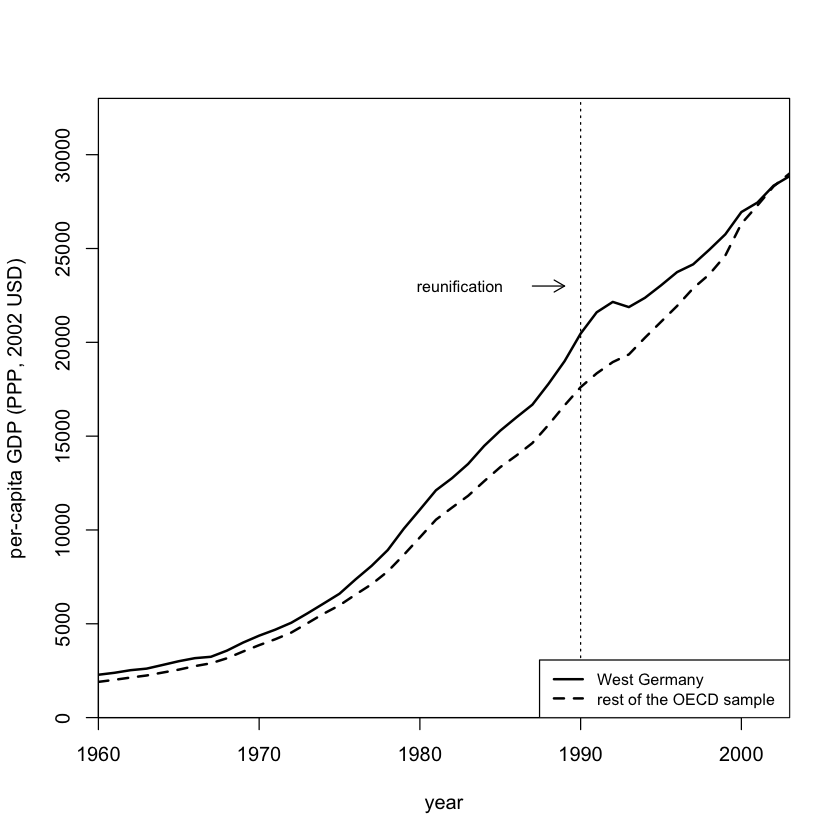

In [37]:
#### Figure 1: Trends in Per-Capita GDP: West Germany vs. Rest of the OECD Sample
Text.height <- 23000
Cex.set <- .8
#pdf(file = "ger_vs_oecd.pdf", width = 5.5, height = 5.5, family = "Times",pointsize = 12)
plot(1960:2003,dataprep.out$Y1plot,
     type="l",ylim=c(0,33000),col="black",lty="solid",
     ylab ="per-capita GDP (PPP, 2002 USD)",
     xlab ="year",
     xaxs = "i", yaxs = "i",
     lwd=2
     )
lines(1960:2003,aggregate(d[,c("gdp")],by=list(d$year),mean,na.rm=T)[,2]
      ,col="black",lty="dashed",lwd=2) # mean 2
abline(v=1990,lty="dotted")
legend(x="bottomright",
       legend=c("West Germany","rest of the OECD sample")
      ,lty=c("solid","dashed"),col=c("black","black")
      ,cex=.8,bg="white",lwd=c(2,2))
arrows(1987,Text.height,1989,Text.height,col="black",length=.1)
text(1982.5,Text.height,"reunification",cex=Cex.set)
#dev.off()

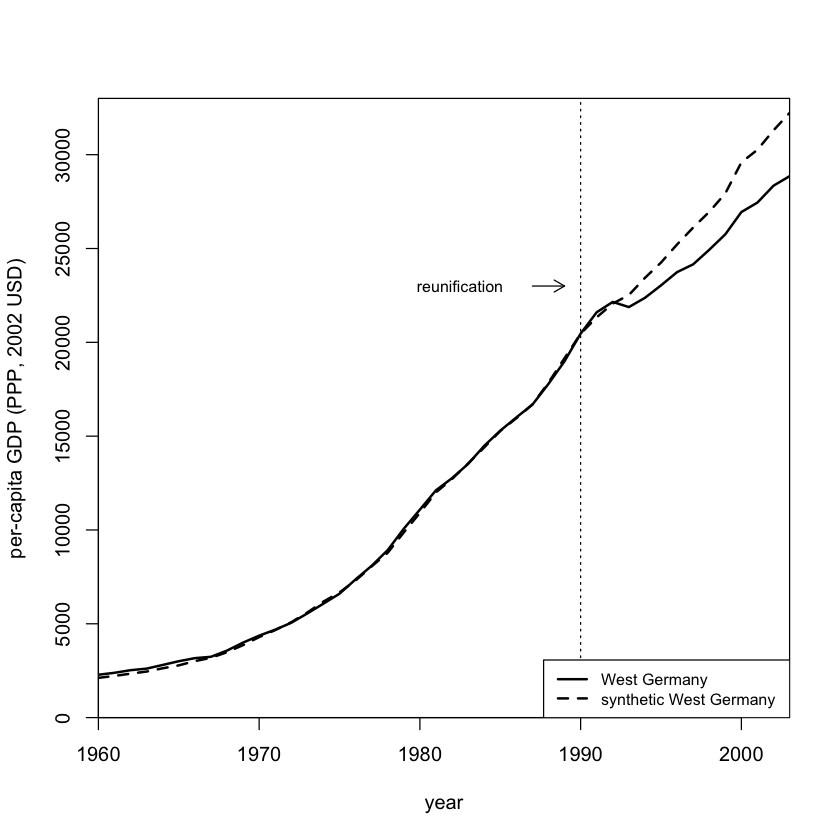

In [38]:
#### Figure 2: Trends in Per-Capita GDP: West Germany vs. Synthetic West Germany
#pdf(file = "ger_vs_synthger2.pdf", width = 5.5, height = 5.5, family = "Times",pointsize = 12)
synthY0 <- (dataprep.out$Y0%*%synth.out$solution.w)
plot(1960:2003,dataprep.out$Y1plot,
     type="l",ylim=c(0,33000),col="black",lty="solid",
     ylab ="per-capita GDP (PPP, 2002 USD)",
     xlab ="year",
     xaxs = "i", yaxs = "i",
     lwd=2
     )
lines(1960:2003,synthY0,col="black",lty="dashed",lwd=2)
abline(v=1990,lty="dotted")
legend(x="bottomright",
       legend=c("West Germany","synthetic West Germany")
      ,lty=c("solid","dashed"),col=c("black","black")
      ,cex=.8,bg="white",lwd=c(2,2))
arrows(1987,Text.height,1989,Text.height,col="black",length=.1)
text(1982.5,Text.height,"reunification",cex=Cex.set)
#dev.off()

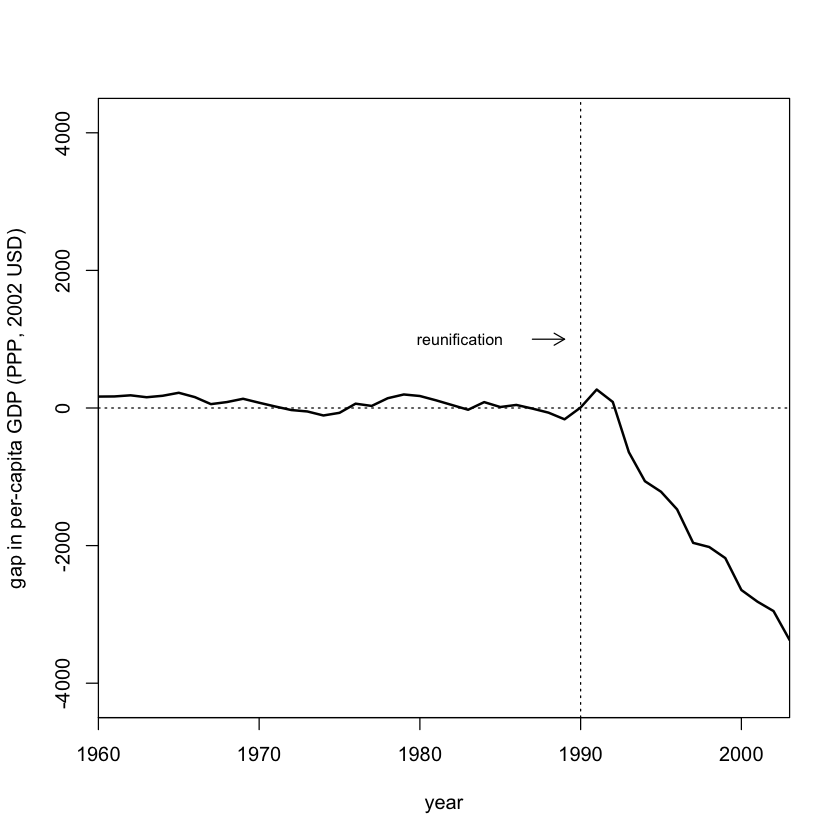

In [39]:
### Figure 3: Per-Capita GDP Gap Between West Germany and Synthetic West Germany
#pdf(file = "ger_vs_synthger_gaps2.pdf", width = 5.5, height = 5.5, family = "Times",pointsize = 12)
gap <- dataprep.out$Y1-(dataprep.out$Y0%*%synth.out$solution.w)
plot(1960:2003,gap,
     type="l",ylim=c(-4500,4500),col="black",lty="solid",
     ylab =c("gap in per-capita GDP (PPP, 2002 USD)"),
     xlab ="year",
     xaxs = "i", yaxs = "i",
     lwd=2
     )
abline(v=1990,lty="dotted")
abline(h=0,lty="dotted")
arrows(1987,1000,1989,1000,col="black",length=.1)
text(1982.5,1000,"reunification",cex=Cex.set)
#dev.off()


 Missing data- treated unit; predictor: infrate ; for period: 1960 
 We ignore (na.rm = TRUE) all missing values for predictors.op.

 Missing data - control unit: 1 ; predictor: infrate ; for period: 1960 
 We ignore (na.rm = TRUE) all missing values for predictors.op.

X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1137.399 

solution.v:
 0.9278487 0.005475534 0.05653638 0.00156965 0.007457272 0.0011125 

solution.w:
 1.80998e-05 1.3743e-06 0.1418761 3.184e-07 7.32e-07 7.821e-07 7.469e-07 2.856e-07 2.224e-07 0.1006167 0.1056347 1.303e-07 1.254e-07 4.046e-07 0.4010986 0.2507506 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 optimization over w weights: computing synthtic control unit 
 


**************** 
 v weights supplied manually: computing synthtic control unit 
 


**************** 
**************** 
*******

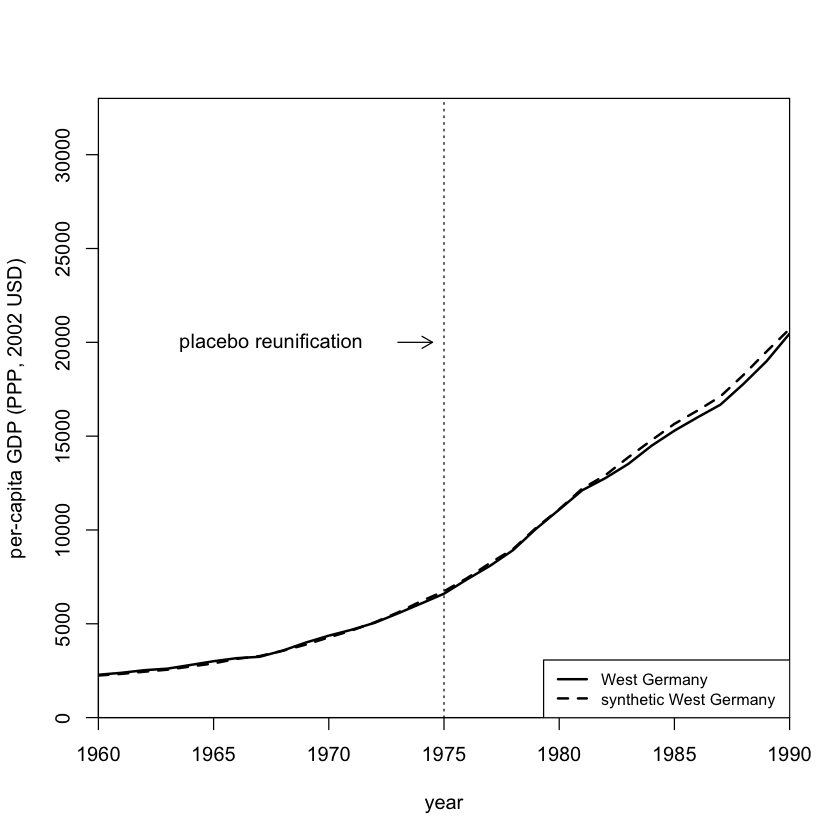

In [40]:
### Figure 4: Placebo Reunification 1975 - Trends in Per-Capita GDP: West Germany vs. Synthetic West Germany

# data prep for training model
dataprep.out <-
  dataprep(
    foo = d,
    predictors    = c("gdp","trade","infrate"),
    dependent     = "gdp",
    unit.variable = 1,
    time.variable = 3,
    special.predictors = list(
      list("industry",1971, c("mean")),
      list("schooling",c(1960,1965), c("mean")),
      list("invest60" ,1980, c("mean"))
    ),
    treatment.identifier = 7,
    controls.identifier = unique(d$index)[-7],
    time.predictors.prior = 1960:1964,
    time.optimize.ssr = 1965:1975,
    unit.names.variable = 2,
    time.plot = 1960:1990
  )

# fit training model
synth.out <- synth(
  data.prep.obj=dataprep.out,
  Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
)


# data prep for main model
dataprep.out <-
  dataprep(
    foo = d,
    predictors    = c("gdp","trade","infrate"),
    dependent     = "gdp",
    unit.variable = 1,
    time.variable = 3,
    special.predictors = list(
      list("industry" ,1971:1975, c("mean")),
      list("schooling",c(1970,1975), c("mean")),
      list("invest70" ,1980, c("mean"))
    ),
    treatment.identifier = 7,
    controls.identifier = unique(d$index)[-7],
    time.predictors.prior = 1965:1975,
    time.optimize.ssr = 1960:1975,
    unit.names.variable = 2,
    time.plot = 1960:1990
  )

# fit main model
synth.out <- synth(
  data.prep.obj=dataprep.out,
  custom.v=as.numeric(synth.out$solution.v)
)

Cex.set <- 1
#pdf(file = "2intimeplacebo1975.pdf", width = 5.5, height = 5.5, family = "Times",pointsize = 12)
plot(1960:1990,dataprep.out$Y1plot,
     type="l",ylim=c(0,33000),col="black",lty="solid",
     ylab ="per-capita GDP (PPP, 2002 USD)",
     xlab ="year",
     xaxs = "i", yaxs = "i",
     lwd=2
     )
lines(1960:1990,(dataprep.out$Y0%*%synth.out$solution.w),col="black",lty="dashed",lwd=2)
abline(v=1975,lty="dotted")
legend(x="bottomright",
       legend=c("West Germany","synthetic West Germany")
      ,lty=c("solid","dashed"),col=c("black","black")
      ,cex=.8,bg="white",lwd=c(2,2))
arrows(1973,20000,1974.5,20000,col="black",length=.1)
text(1967.5,20000,"placebo reunification",cex=Cex.set)
#dev.off()


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1066984 

solution.v:
 1.71087e-05 5.76308e-05 0.9996444 0.0001086273 1.9315e-06 0.0001703119 

solution.w:
 0.3239383 5.3337e-06 2.22e-08 1.40341e-05 1.14605e-05 2.02454e-05 3.382e-06 1.4379e-06 3.2421e-06 0.6759585 3.4087e-06 4.9668e-06 2.742e-06 3.8315e-06 2.30693e-05 5.9599e-06 


 Missing data - control unit: 7 ; special predictor: special.industry.1981.1990 ; for period: 1990 
 We ignore (na.rm = TRUE) all missing values for predictors.op.

X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 optimization over w weights: computing synthtic control unit 
 


**************** 
 v weights supplied manually: computing synthtic control unit 
 


**************** 
**************** 
**************** 

MSPE (LOSS V): 3352603 

solution.v:
 1.71087e-05 5.76308e-05 0.9996444 0.0001

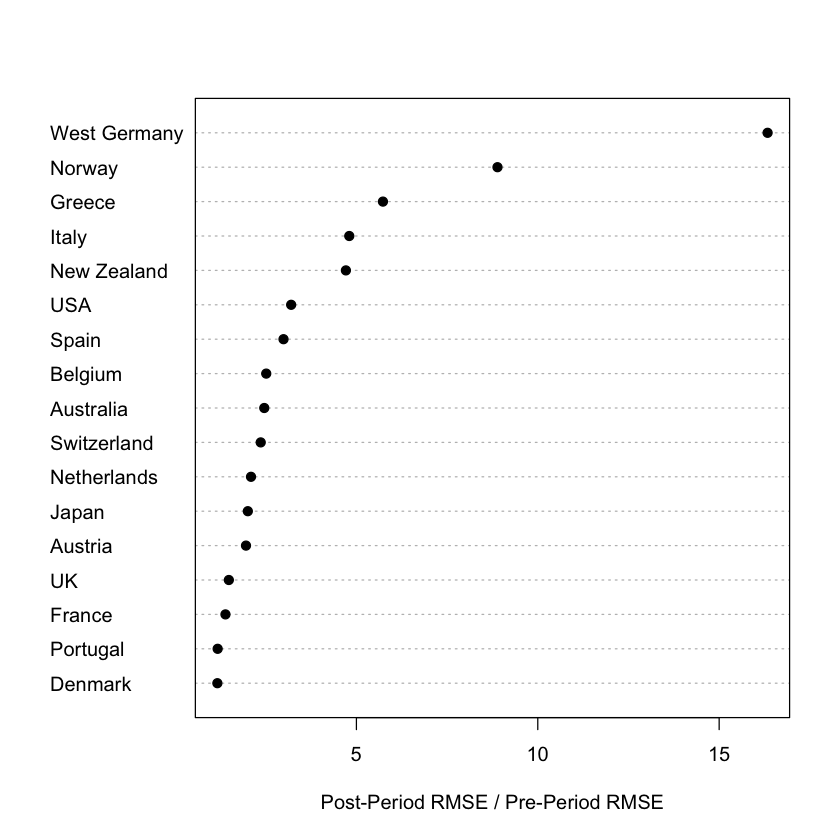

In [41]:
### Figure 5: Ratio of post-reunification RMSPE to pre-reunification RMSPE: West Germany and control countries.

# loop across control units
storegaps <- 
  matrix(NA,
        length(1960:2003),
        length(unique(d$index))-1
        )
rownames(storegaps) <- 1960:2003
i <- 1
co <- unique(d$index)

for(k in unique(d$index)[-7]){
  
  # data prep for training model
  dataprep.out <-
    dataprep(
      foo = d,
      predictors    = c("gdp","trade","infrate"),
      dependent     = "gdp",
      unit.variable = 1,
      time.variable = 3,
      special.predictors = list(
        list("industry",1971:1980, c("mean")),
        list("schooling"   ,c(1970,1975), c("mean")),
        list("invest70" ,1980, c("mean"))
      ),
      treatment.identifier = k,
      controls.identifier = co[-which(co==k)],
      time.predictors.prior = 1971:1980,
      time.optimize.ssr = 1981:1990,
      unit.names.variable = 2,
      time.plot = 1960:2003
    )

  # fit training model
  synth.out <-
   synth(
    data.prep.obj=dataprep.out,
    Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
   )

  # data prep for main model
dataprep.out <-
    dataprep(
      foo = d,
      predictors    = c("gdp","trade","infrate"),
      dependent     = "gdp",
      unit.variable = 1,
      time.variable = 3,
      special.predictors = list(
        list("industry" ,1981:1990, c("mean")),
        list("schooling",c(1980,1985), c("mean")),
        list("invest80" ,1980, c("mean"))
      ),
      treatment.identifier = k,
      controls.identifier = co[-which(co==k)],
      time.predictors.prior = 1981:1990,
      time.optimize.ssr = 1960:1989,
      unit.names.variable = 2,
      time.plot = 1960:2003
    )

# fit main model
synth.out <- synth(
   data.prep.obj=dataprep.out,
   custom.v=as.numeric(synth.out$solution.v)
  )

 storegaps[,i] <-  
   dataprep.out$Y1-
   (dataprep.out$Y0%*%synth.out$solution.w)
 i <- i + 1
} # close loop over control units
d <- d[order(d$index,d$year),]
colnames(storegaps) <- unique(d$country)[-7]
storegaps <- cbind(gap,storegaps)
colnames(storegaps)[1] <- c("West Germany")

# compute ratio of post-reunification RMSPE 
# to pre-reunification RMSPE                                                  
rmse <- function(x){sqrt(mean(x^2))}
preloss <- apply(storegaps[1:30,],2,rmse)
postloss <- apply(storegaps[31:44,],2,rmse)

#pdf("2ratio_post_to_preperiod_rmse2a.pdf")
dotchart(sort(postloss/preloss),
         xlab="Post-Period RMSE / Pre-Period RMSE",
         pch=19)
#dev.off()


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 7178.769 

solution.v:
 0.2292575 0.4851934 0.2206547 2.40369e-05 0.0002001802 0.0646702 

solution.w:
 2.118e-07 0.3605678 7.28e-08 1.457e-07 7.893e-07 1.337e-07 9.61e-08 8.33e-08 0.2926397 0.2401992 1.501e-07 3.57e-08 1.701e-07 0.1065912 1.523e-07 


 Missing data: treated unit; special predictor: special.industry.1981.1990 ; for period: 1990 
 We ignore (na.rm = TRUE) all missing values for predictors.op.

X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 optimization over w weights: computing synthtic control unit 
 


**************** 
 v weights supplied manually: computing synthtic control unit 
 


**************** 
**************** 
**************** 

MSPE (LOSS V): 46135.92 

solution.v:
 0.2292575 0.4851934 0.2206547 2.40369e-05 0.0002001802 0.0646702 

solution.w

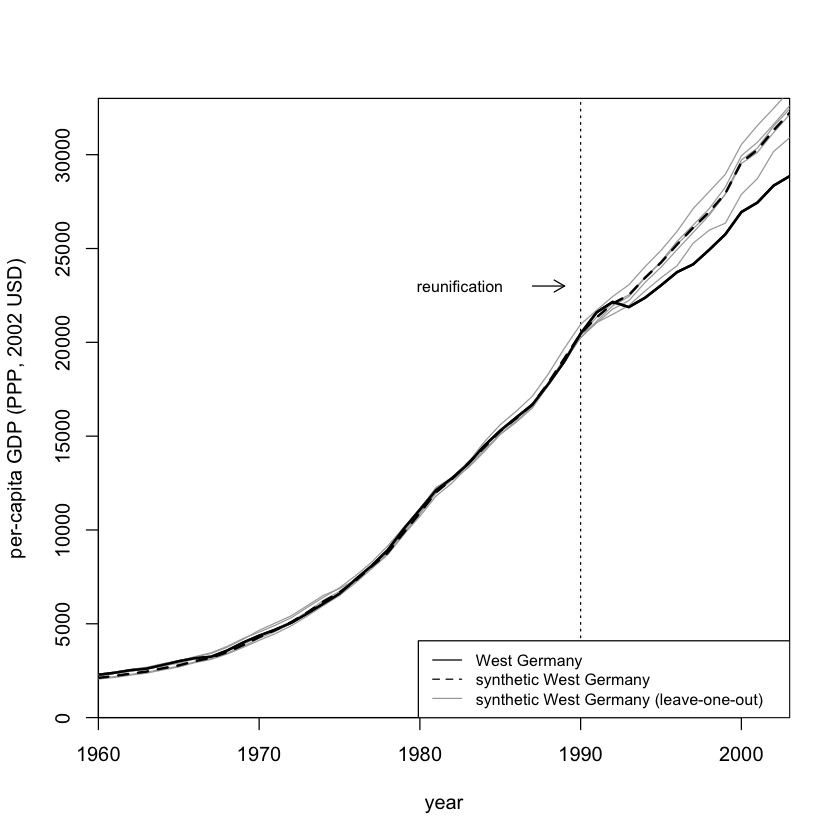

In [42]:
### Figure 6: Leave-one-out distribution of the synthetic control for West Germany

# loop over leave one outs
storegaps <- 
  matrix(NA,
        length(1960:2003),
        5)
colnames(storegaps) <- c(1,3,9,12,14)
co <- unique(d$index)[-7]

for(k in 1:5){

# data prep for training model
omit <- c(1,3,9,12,14)[k]  
  dataprep.out <-
    dataprep(
      foo = d,
      predictors    = c("gdp","trade","infrate"),
      dependent     = "gdp",
      unit.variable = 1,
      time.variable = 3,
      special.predictors = list(
        list("industry",1971:1980, c("mean")),
        list("schooling"   ,c(1970,1975), c("mean")),
        list("invest70" ,1980, c("mean"))
      ),
      treatment.identifier = 7,
      controls.identifier = co[-which(co==omit)],
      time.predictors.prior = 1971:1980,
      time.optimize.ssr = 1981:1990,
      unit.names.variable = 2,
      time.plot = 1960:2003
    )
  
  # fit training model
  synth.out <- synth(
    data.prep.obj=dataprep.out,
    Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
  )
  
# data prep for main model
dataprep.out <-
  dataprep(
    foo = d,
    predictors    = c("gdp","trade","infrate"),
    dependent     = "gdp",
    unit.variable = 1,
    time.variable = 3,
    special.predictors = list(
      list("industry" ,1981:1990, c("mean")),
      list("schooling",c(1980,1985), c("mean")),
      list("invest80" ,1980, c("mean"))
    ),
    treatment.identifier = 7,
    controls.identifier = co[-which(co==omit)],
    time.predictors.prior = 1981:1990,
    time.optimize.ssr = 1960:1989,
    unit.names.variable = 2,
    time.plot = 1960:2003
  )
  
  # fit main model 
  synth.out <- synth(
    data.prep.obj=dataprep.out,
    custom.v=as.numeric(synth.out$solution.v)
  )
  storegaps[,k] <- (dataprep.out$Y0%*%synth.out$solution.w)
} # close loop over leave one outs

Text.height <- 23000
Cex.set <- .8
#pdf(file = "1jackknife2.pdf", width = 5.5, height = 5.5, family = "Times",pointsize = 12)
plot(1960:2003,dataprep.out$Y1plot,
     type="l",ylim=c(0,33000),col="black",lty="solid",
     ylab ="per-capita GDP (PPP, 2002 USD)",
     xlab ="year",
     xaxs = "i", yaxs = "i",lwd=2
     )

abline(v=1990,lty="dotted")
arrows(1987,23000,1989,23000,col="black",length=.1)
 for(i in 1:5){
  lines(1960:2003,storegaps[,i],col="darkgrey",lty="solid")
  }
lines(1960:2003,synthY0,col="black",lty="dashed",lwd=2)
lines(1960:2003,dataprep.out$Y1plot,col="black",lty="solid",lwd=2)
text(1982.5,23000,"reunification",cex=.8)
legend(x="bottomright",
       legend=c("West Germany",
                "synthetic West Germany",
                "synthetic West Germany (leave-one-out)")
      ,lty=c("solid","dashed","solid"),
      col=c("black","black","darkgrey")
      ,cex=.8,bg="white",lwdc(2,2,1))
#dev.off()

In [43]:
### Table 3: Synthetic Weights from Combinations of Control Countries
rm(list=ls())
library(gtools)
library(kernlab)

# data prep for training model
d <- read.dta("repgermany.dta")
dataprep.out <-
  dataprep(
    foo = d,
    predictors    = c("gdp","trade","infrate"),
    dependent     = "gdp",
    unit.variable = 1,
    time.variable = 3,
    special.predictors = list(
      list("industry", 1971:1980, c("mean")),
      list("schooling",c(1970,1975), c("mean")),
      list("invest70" ,1980, c("mean"))
    ),
    treatment.identifier = 7,
    controls.identifier = unique(d$index)[-7],
    time.predictors.prior = 1971:1980,
    time.optimize.ssr = 1981:1990,
    unit.names.variable = 2,
    time.plot = 1960:2003
  )

# fit training model
synth.out <- 
  synth(
    data.prep.obj=dataprep.out,
    Margin.ipop=.005,Sigf.ipop=7,Bound.ipop=6
  )

# data prep for main model
dataprep.out <-
  dataprep(
    foo = d,
    predictors    = c("gdp","trade","infrate"),
    dependent     = "gdp",
    unit.variable = 1,
    time.variable = 3,
    special.predictors = list(
      list("industry" ,1981:1990, c("mean")),
      list("schooling",c(1980,1985), c("mean")),
      list("invest80" ,1980, c("mean"))
    ),
    treatment.identifier = 7,
    controls.identifier = unique(d$index)[-7],
    time.predictors.prior = 1981:1990,
    time.optimize.ssr = 1960:1989,
    unit.names.variable = 2,
    time.plot = 1960:2003
  )

# fit main model with v from training model
synth.out <- synth(
  data.prep.obj=dataprep.out,
  custom.v=as.numeric(synth.out$solution.v)
)

synth.tables <- synth.tab(
  dataprep.res = dataprep.out,
  synth.res = synth.out
)

table3 <- list()
synth.tables$tab.w[,1] <- round(synth.tables$tab.w[,1],2)
table3[[5]] <-synth.tables$tab.w[order(-1*synth.tables$tab.w[,1]),2:1][1:5,]

# compute loss for all combinations 
# of 4, 3, 2, 1 sized donor pools

# get W and v
solution.w <- round(synth.out$solution.w,3)
V <- diag(as.numeric(synth.out$solution.v))

# compute scaled Xs
nvarsV <- dim(dataprep.out$X0)[1]
big.dataframe <- cbind(dataprep.out$X0, dataprep.out$X1)
divisor <- sqrt(apply(big.dataframe, 1, var))
scaled.matrix <-
  t(t(big.dataframe) %*% ( 1/(divisor) *
  diag(rep(dim(big.dataframe)[1], 1)) ))
X0.scaled <- scaled.matrix[,c(1:(dim(dataprep.out$X0)[2]))]
X1.scaled <- as.matrix(scaled.matrix[,dim(scaled.matrix)[2]])

dn <- d[d$year==1970,c("country","index")]
dn <- dn[order(dn$index),]
dn <- dn[-7,]

table2store <- matrix(NA,nrow(dataprep.out$X1),4)
fig7store   <- matrix(NA,length(1960:2003),4)  

# loop through number of controls
for(pp in 4:1){
  store       <- combinations(length(unique(d$index)[-7]),
                              r=pp, v=unique(d$index)[-7])
  store.loss  <- matrix(NA,nrow=nrow(store),1)
  store.w     <- matrix(NA,nrow=nrow(store),pp)
  store.c     <- store.w

# loop through combinations 
  for(k in 1:nrow(store)){
    # index positions of control units
    posvector <- c()
    for(i in 1:pp){
      posvector <- c(posvector,which(dn$index==store[k,i]))
    }
    
  # run quad optimization  
    X0temp <- X0.scaled[ , posvector ]
    H <- t(X0temp) %*% V %*% (X0temp)
    c <- -1*c(t(X1.scaled) %*% V %*% (X0temp) )

    if(pp == 1){
      solution.w <- matrix(1)
    } else {      
        res <- ipop(c = c, H = H, A = t(rep(1, length(c))),
                    b = 1, l = rep(0, length(c)),
                    u = rep(1, length(c)), r = 0,
                    margin = 0.005,sigf = 7, bound = 6)
        solution.w <- as.matrix(primal(res))
    }
    loss.w <- t(X1.scaled - X0temp %*% solution.w) %*% V %*% (X1.scaled - X0temp %*% solution.w)
    
    store.loss[k] <- loss.w
    store.w[k,]   <- t(solution.w)
    store.c[k,]   <- dn$country[posvector]
  } # close loop over combinations
  
# get best fitting combination
  dat <- data.frame(store.loss,
                    store,
                    store.c,
                    store.w
                    )
  colnames(dat) <- c("loss",
                     paste("CNo",1:pp,sep=""),
                     paste("CNa",1:pp,sep=""),
                     paste("W",1:pp,sep="")
                     )
  dat <- dat[order(dat$loss),]
  Countries <- dat[1,paste("CNo",1:pp,sep="")]
  Cweights  <- as.numeric(dat[1,paste("W",1:pp,sep="")])
 
  outdat <-  data.frame(unit.names=as.vector(
   (t(as.vector(dat[1,paste("CNa",1:pp,sep="")])))),
                    w.weights=round(Cweights,2))

table3[[pp]]<- outdat[order(-1*outdat$w.weights),]
  
 # get posvector for fitting
  posvector <- c()
  if(pp == 1 ){
    posvector <- c(posvector,which(dn$index==Countries))
  } else {
    for(i in 1:pp){
      posvector <- c(posvector,which(dn$index==Countries[1,i]))
    }
  }
   
  X0t <- as.matrix(dataprep.out$X0[,posvector])%*% as.matrix(Cweights)
  table2store[,(4:1)[pp]] <- X0t

  fig7store[,(4:1)[pp]] <- 
   dataprep.out$Y0[,posvector]%*%as.matrix(Cweights)

} # close loop over number of countries

# Table 3
table3

ERROR: Error in read.dta("repgermany.dta"): unable to open file: 'No such file or directory'


In [ ]:
# Table 4
synth.tables$tab.pred[,3] <- c(8021.1,31.9,7.4,34.2,44.1,25.9)
table4 <- round(
  cbind(synth.tables$tab.pred[,1:2],
        table2store,
        synth.tables$tab.pred[,3]),1)
rownames(table4) <- c("GDP per-capita","Trade openness",
                      "Inflation rate","Industry share",
                      "Schooling","Investment rate")
colnames(table4)[2:7] <- c(5:1,"OECD Sample")
table4

## Figure 7: Per-Capita GDP Gaps Between West Germany and Sparse Synthetic Controls
Text.height <- 23000
Cex.set <- .8

par(mfrow=c(2,2)) 
for(pp in 4:1){
#pdf(file = paste("2ger_vs_synth","CValt",pp,".pdf",sep=""), width = 5.5, height = 5.5, family = "Times",pointsize = 12)
  plot(1960:2003,dataprep.out$Y1,
       type="l",ylim=c(0,33000),col="black",lty="solid",
       ylab ="per-capita GDP (PPP, 2002 USD)",
       xlab ="year",
       xaxs = "i", yaxs = "i",
       lwd=2,
       main=paste("No. of control countries: ",pp,sep="")
       )
  lines(1960:2003,fig7store[,c(4:1)[pp]],col="black",lty="dashed",lwd=2)
  abline(v=1990,lty="dotted")
  legend(x="bottomright",
         legend=c("West Germany","synthetic West Germany")
         ,lty=c("solid","dashed"),col=c("black","black")
         ,cex=.8,bg="white",lwd=c(2,2))
  arrows(1987,Text.height,1989,Text.height,col="black",length=.1)
  text(1982.5,Text.height,"reunification",cex=Cex.set)
  #dev.off()
}